<a href="https://colab.research.google.com/github/abhishtmishra/ILPD-Analysis/blob/main/Abhisht_Mishra_Indian_Liver_Patient_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Indian Liver Patient Dataset

###### **About:** This dataset contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

###### **NOTE:** Any patient whose age exceeded 89 is listed as being of age "90".





**A project by Abhisht Mishra**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import plotly.express as px

In [ ]:
# import Dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv'
df = pd.read_csv(url, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
# Labeling the dataset
df.columns = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio', 'Label']
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


###### There are 583 rows and 11 columns in the ILPD dataset.

###### Basic Checks

In [ ]:
# Printing the first 5 rows from the dataset
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# Printing the last 5 rows from the dataset
df.tail()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Label
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [ ]:
# Getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Label      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
# Getting the descriptive statistical  details about the dataset
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Label
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
# Checking for duplicate values
df.duplicated().sum()

13

There are 13 duplicate values in the dataset.

In [ ]:
## printing the duplicated data
df[df.duplicated()]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Label
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [ ]:
# Removing the duplicate data
df = df.drop_duplicates()

In [ ]:
# Re-checking for duplicate values
df.duplicated().sum()

0

In [ ]:
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Now there are no duplicate values in the dataset. After their removal, there are 570 rows and 11 columns in the dataset.

In [ ]:
# Checking for any missing/NULL values
df.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Label        0
dtype: int64

'A/G Ratio' column has 4 NULL values.

### Handling the missing  values 

<ipython-input-14-b6dc37e9c754>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['A/G Ratio'], color='gray')


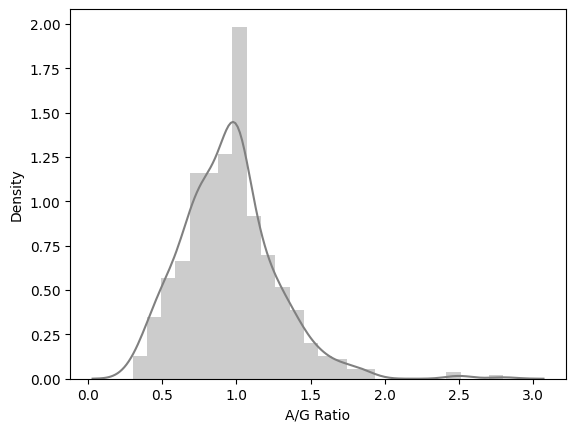

In [ ]:
# Distribution plot for A/G Ratio
sns.distplot(df['A/G Ratio'], color='gray')
plt.show()

In [ ]:
# Calculating Median of values of column A/G Ratio
df['A/G Ratio'].median()

0.95

In [ ]:
# printing the rows containing NULL values
df.loc[df['A/G Ratio'].isnull()==True]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Label
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [ ]:
# Replacing the missing values with the median of values
df.loc[df['A/G Ratio'].isnull()==True,'A/G Ratio']=0.95

In [ ]:
# Rechecking for any missing/NULL values
df.isnull().sum() 

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    0
Label        0
dtype: int64

Now there are no missing/NULL values in the dataset.

### Exploratory Data Analysis

##### Univariate Analysis

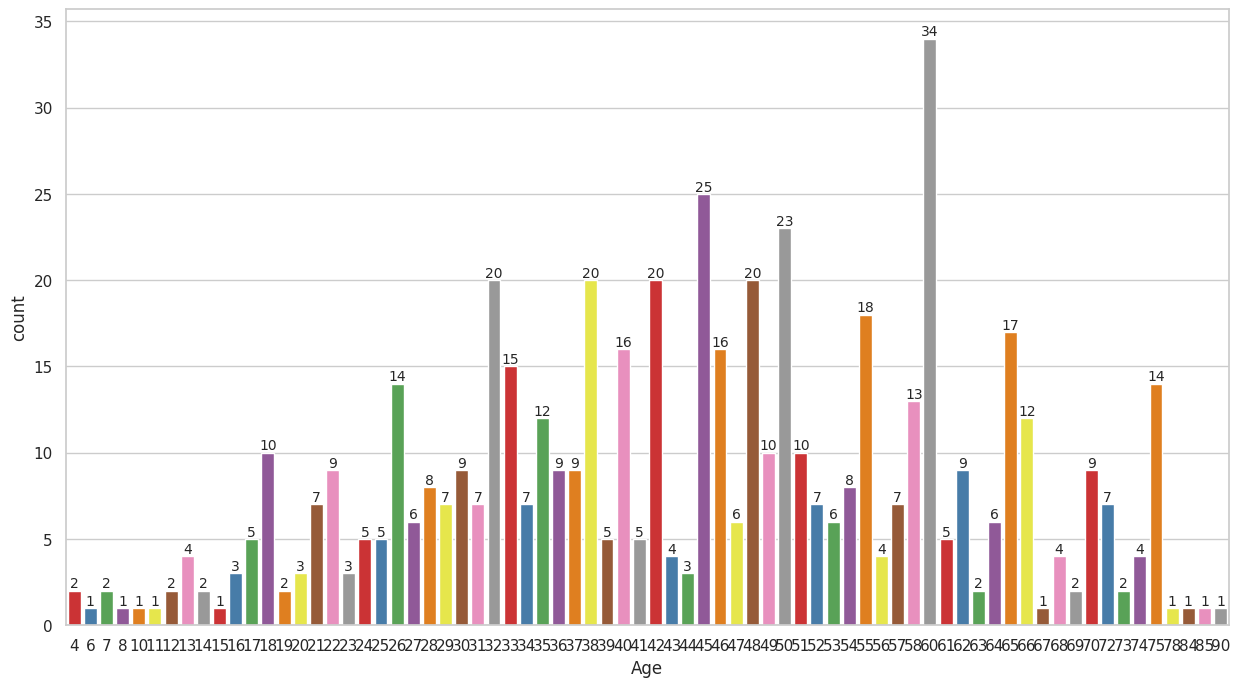

In [ ]:
# Analysing Age
sns.set(style='whitegrid')
plt.figure(figsize=(15,8))
b = sns.countplot(x='Age', data=df, palette='Set1')
for bar in b.containers:
    b.bar_label(bar, label_type='edge', fontsize=10)
plt.show()

###### There are more number of people i.e 34 people with age 60


In [ ]:
## Analysing Gender
df['Gender'].value_counts()

Male      430
Female    140
Name: Gender, dtype: int64

###### The dataset contains records of 430 Males and 140 Females.

<ipython-input-21-3f8c9837f5da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].astype('category')


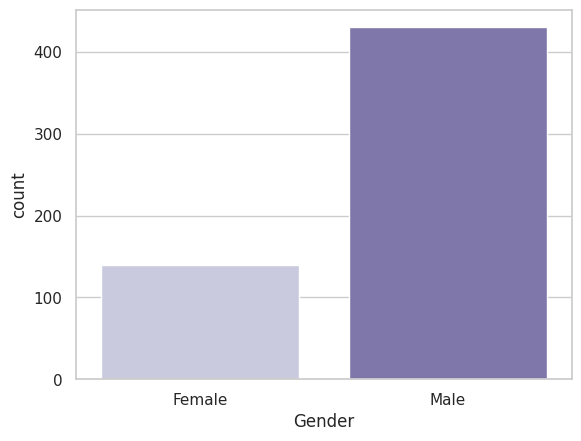

In [ ]:
# plotting the count of the Gender column values
df['Gender'] = df['Gender'].astype('category')
sns.countplot(x='Gender', data=df, palette='Purples')
plt.show() 

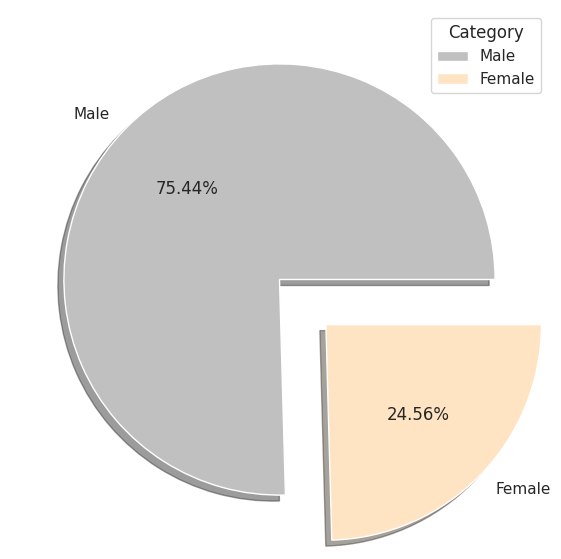

In [ ]:
# Plotting the pie graph showing their count in percentage
plt.figure(figsize=(7,7))
labels=['Male','Female']
size=df['Gender'].value_counts()
colors=['silver','bisque']
explode=[0,0.3]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
plt.legend(labels,loc=0,title='Category')
plt.show()

Dataset contains records of 75.44 % of the people who are Male and 24.56% of the people who are Female.

In [ ]:
# Analysing Dataset
df['Label'].value_counts()

1    406
2    164
Name: Label, dtype: int64

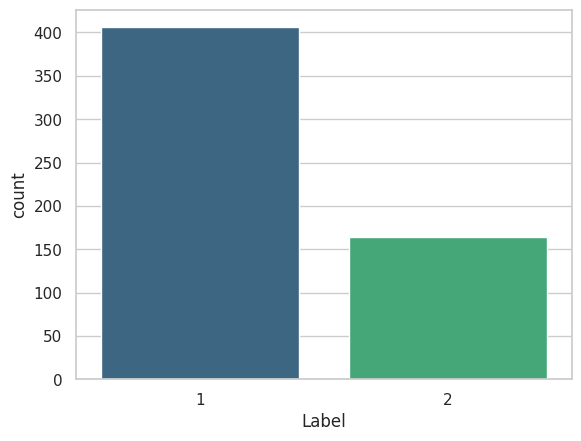

In [ ]:
# plotting the count of distinct values in the Label column
sns.countplot(x='Label', data=df, palette='viridis')
plt.show()

**NOTE:** 1 shows the people who are affected and 2 shows people who are not affected.

**Inference:** 406 people are Liver patient and 164 people are Non-Liver patient.

**Analysis for Continuous Data**

In [ ]:
df1=df[['TB','DB','TP','ALB','A/G Ratio']]

<ipython-input-26-81f2984a02e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df1[column],color='tab:purple')
<ipython-input-26-81f2984a02e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df1[column],color='tab:purple')
<ipython-input-26-81f2984a02e3>:7: UserWarning: 

`distplot` is a 

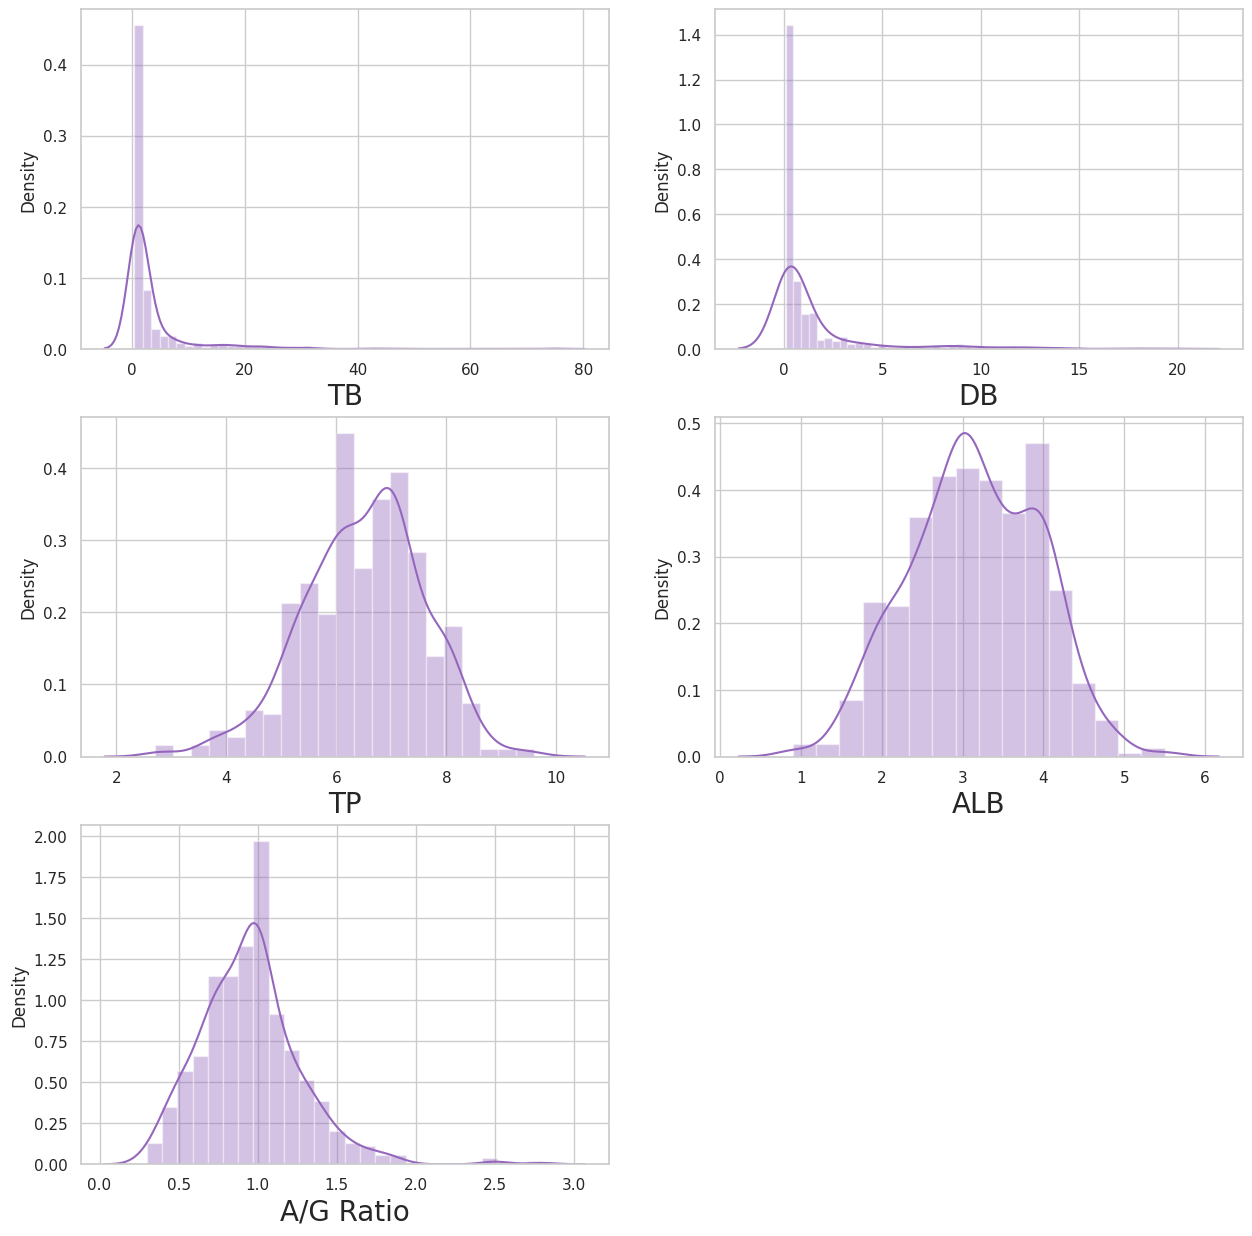

In [ ]:
plt.figure(figsize=(15,15))
plotnumber=1

for column in df1:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(x=df1[column],color='tab:purple')
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
plt.show()

**'TB'** and **'DB'** shows Standard Normal Distribution. **'TP'**,**'ALB'** and **'A/G Ratio'** shows Normal Distribution.

**Analysing 'Alkphos', 'Sgpt', 'Sgot' columns.**

In [ ]:
df2=df[['Alkphos','Sgpt','Sgot']]

In [ ]:
plt.figure(figsize=(200,120))
plotnumber=1

for column in df2:
    if plotnumber<=5:
        ax=plt.subplot(3,1,plotnumber)
        sns.countplot(x=df2[column],palette='Set3')
        plt.xlabel(column,fontsize=30)
        plotnumber +=1
plt.show()

**Bivariate and Multivariate Analysis**

**Analysing 'Age' and 'Gender' columns.**

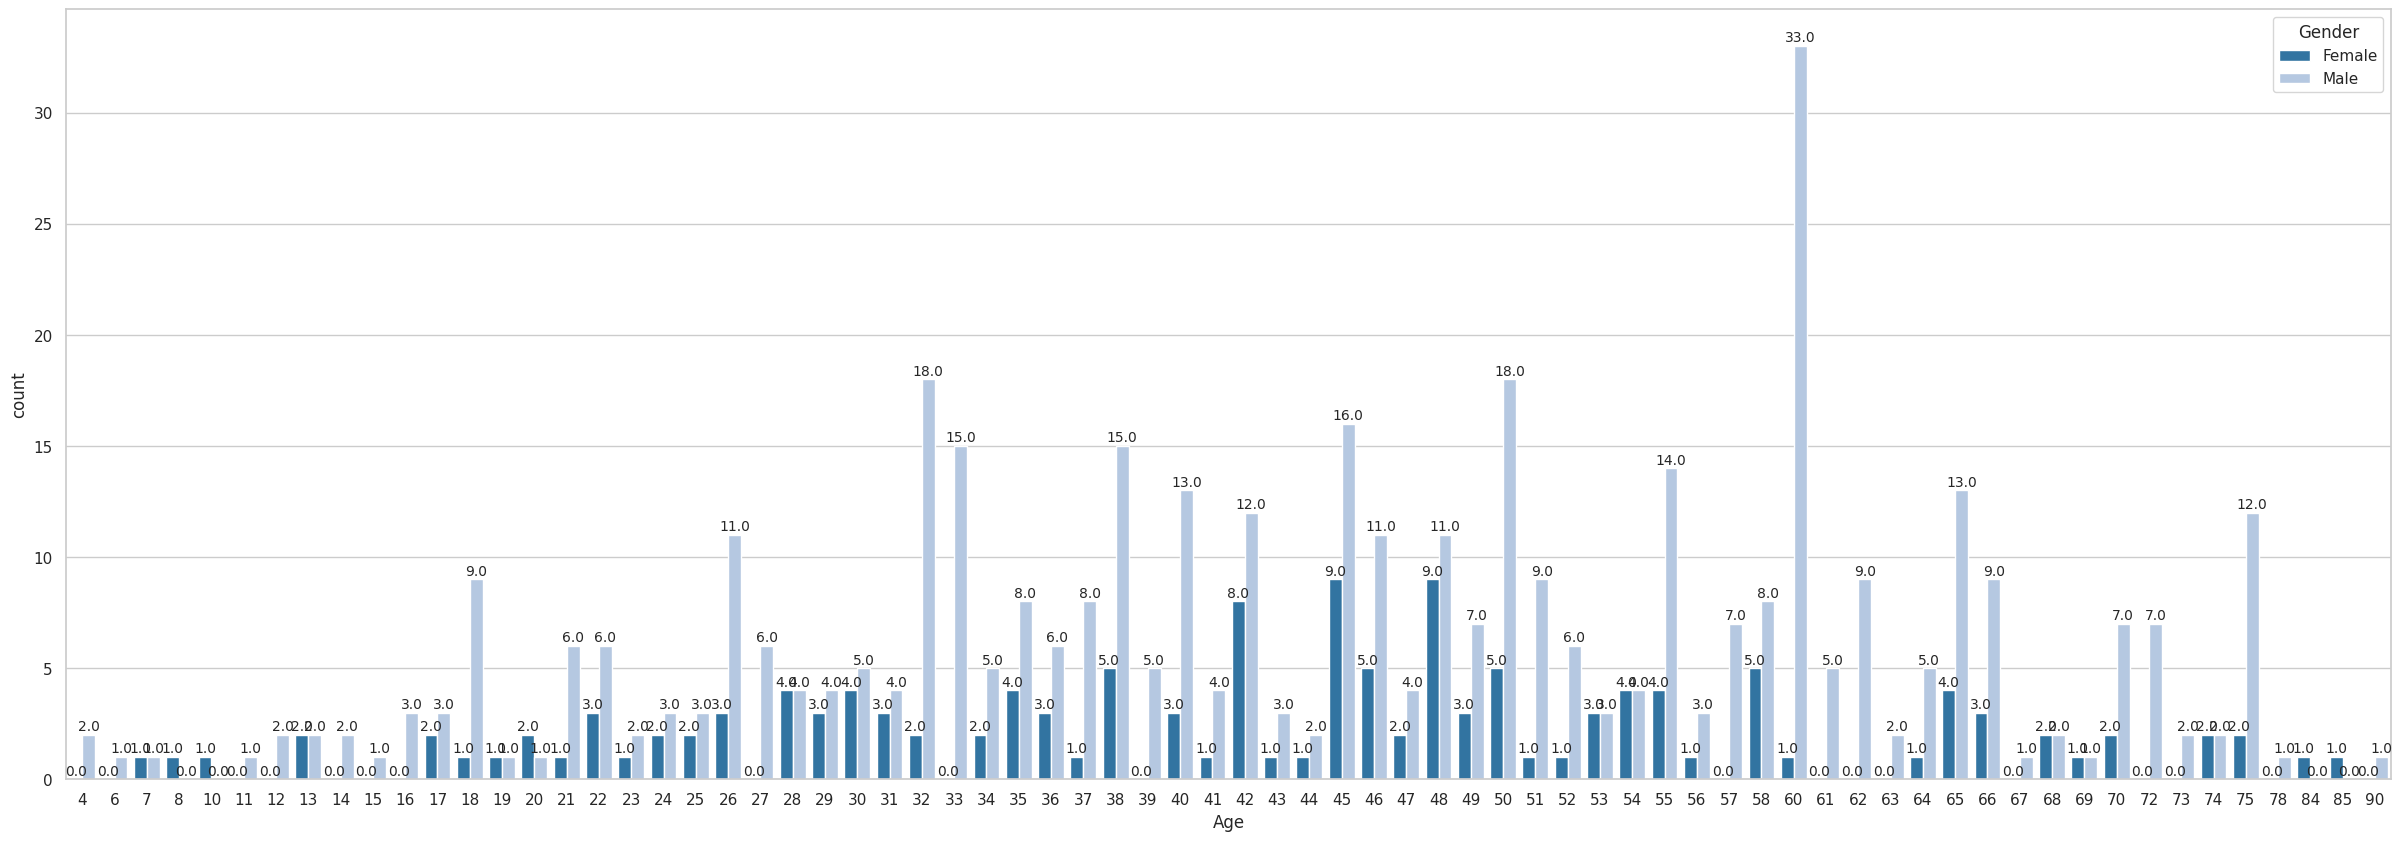

In [ ]:
plt.figure(figsize=(30,10))
b=sns.countplot(x=df['Age'],hue=df['Gender'],palette='tab20')
for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show() 

**Inference:** There are 33 Males with age 60 and 9 Females with age 45 and 48.

**Analysing 'Gender' and  'Label' Columns.**

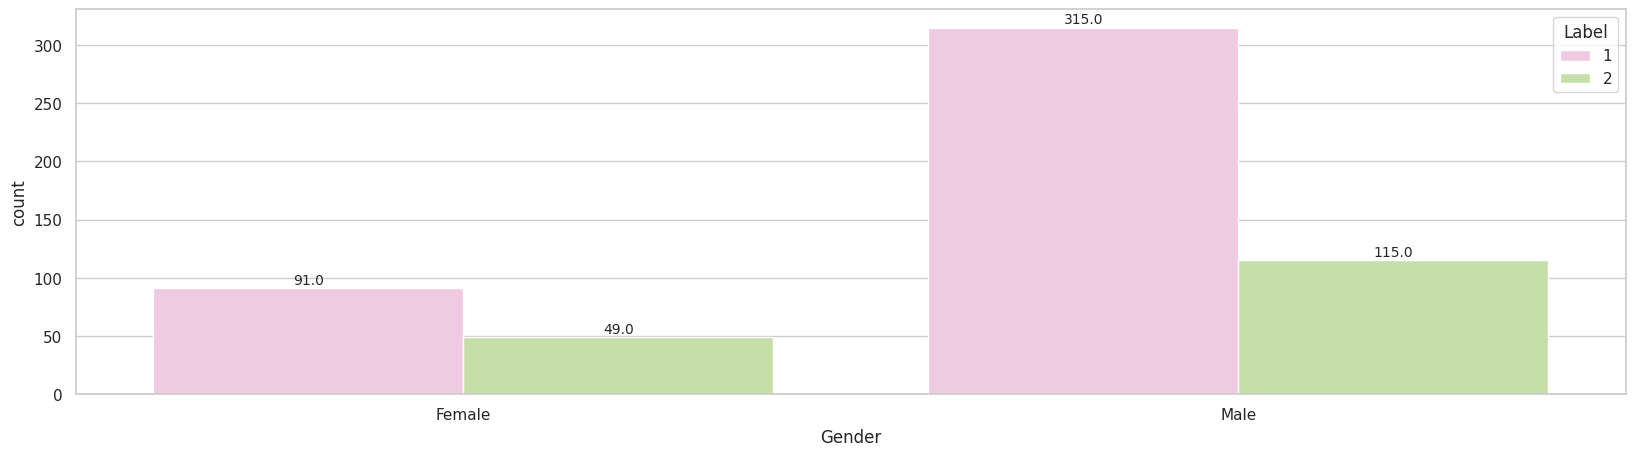

In [ ]:
plt.figure(figsize=(20,5))
b=sns.countplot(x=df['Gender'],hue=df['Label'],palette='PiYG')
for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show() 

**Inference:** 315 Males and 91 Females have Liver disease.

**Heatmap:**

<ipython-input-31-79c99ce33384>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop('Label',axis=1).corr(),annot=True,cmap='PuBuGn')


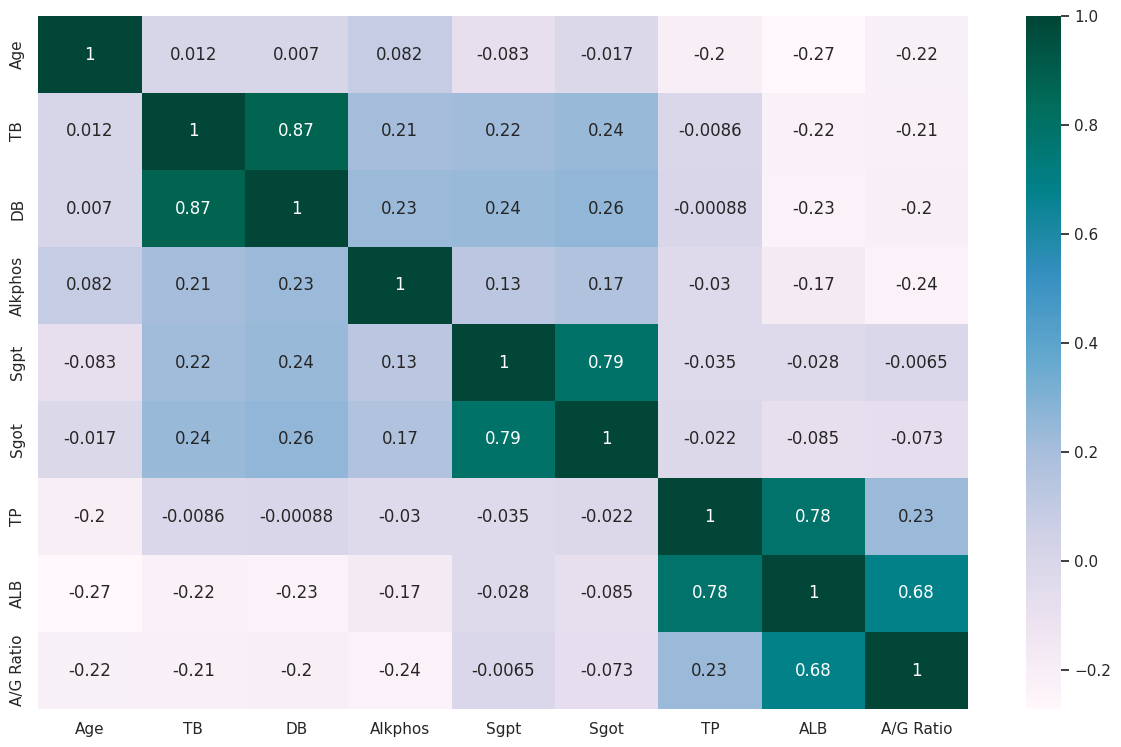

In [ ]:
# plotting heatmap
plt.figure(figsize=(15,9))
sns.heatmap(df.drop('Label',axis=1).corr(),annot=True,cmap='PuBuGn')
plt.show()

**Inference:** The correlation between  


*   **'DB'** and **'TB'** is high.
*   **'Sgpt'** and **'Sgot'** is high. 
*   **'TP'** and  **'ALB'** is high.  
*  **'ALB'** and **'A/G Ratio'** is high. 

In [ ]:
## Checking for outliers
df3=df.drop(['Gender','Label'],axis=1)

In [ ]:
df3

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00


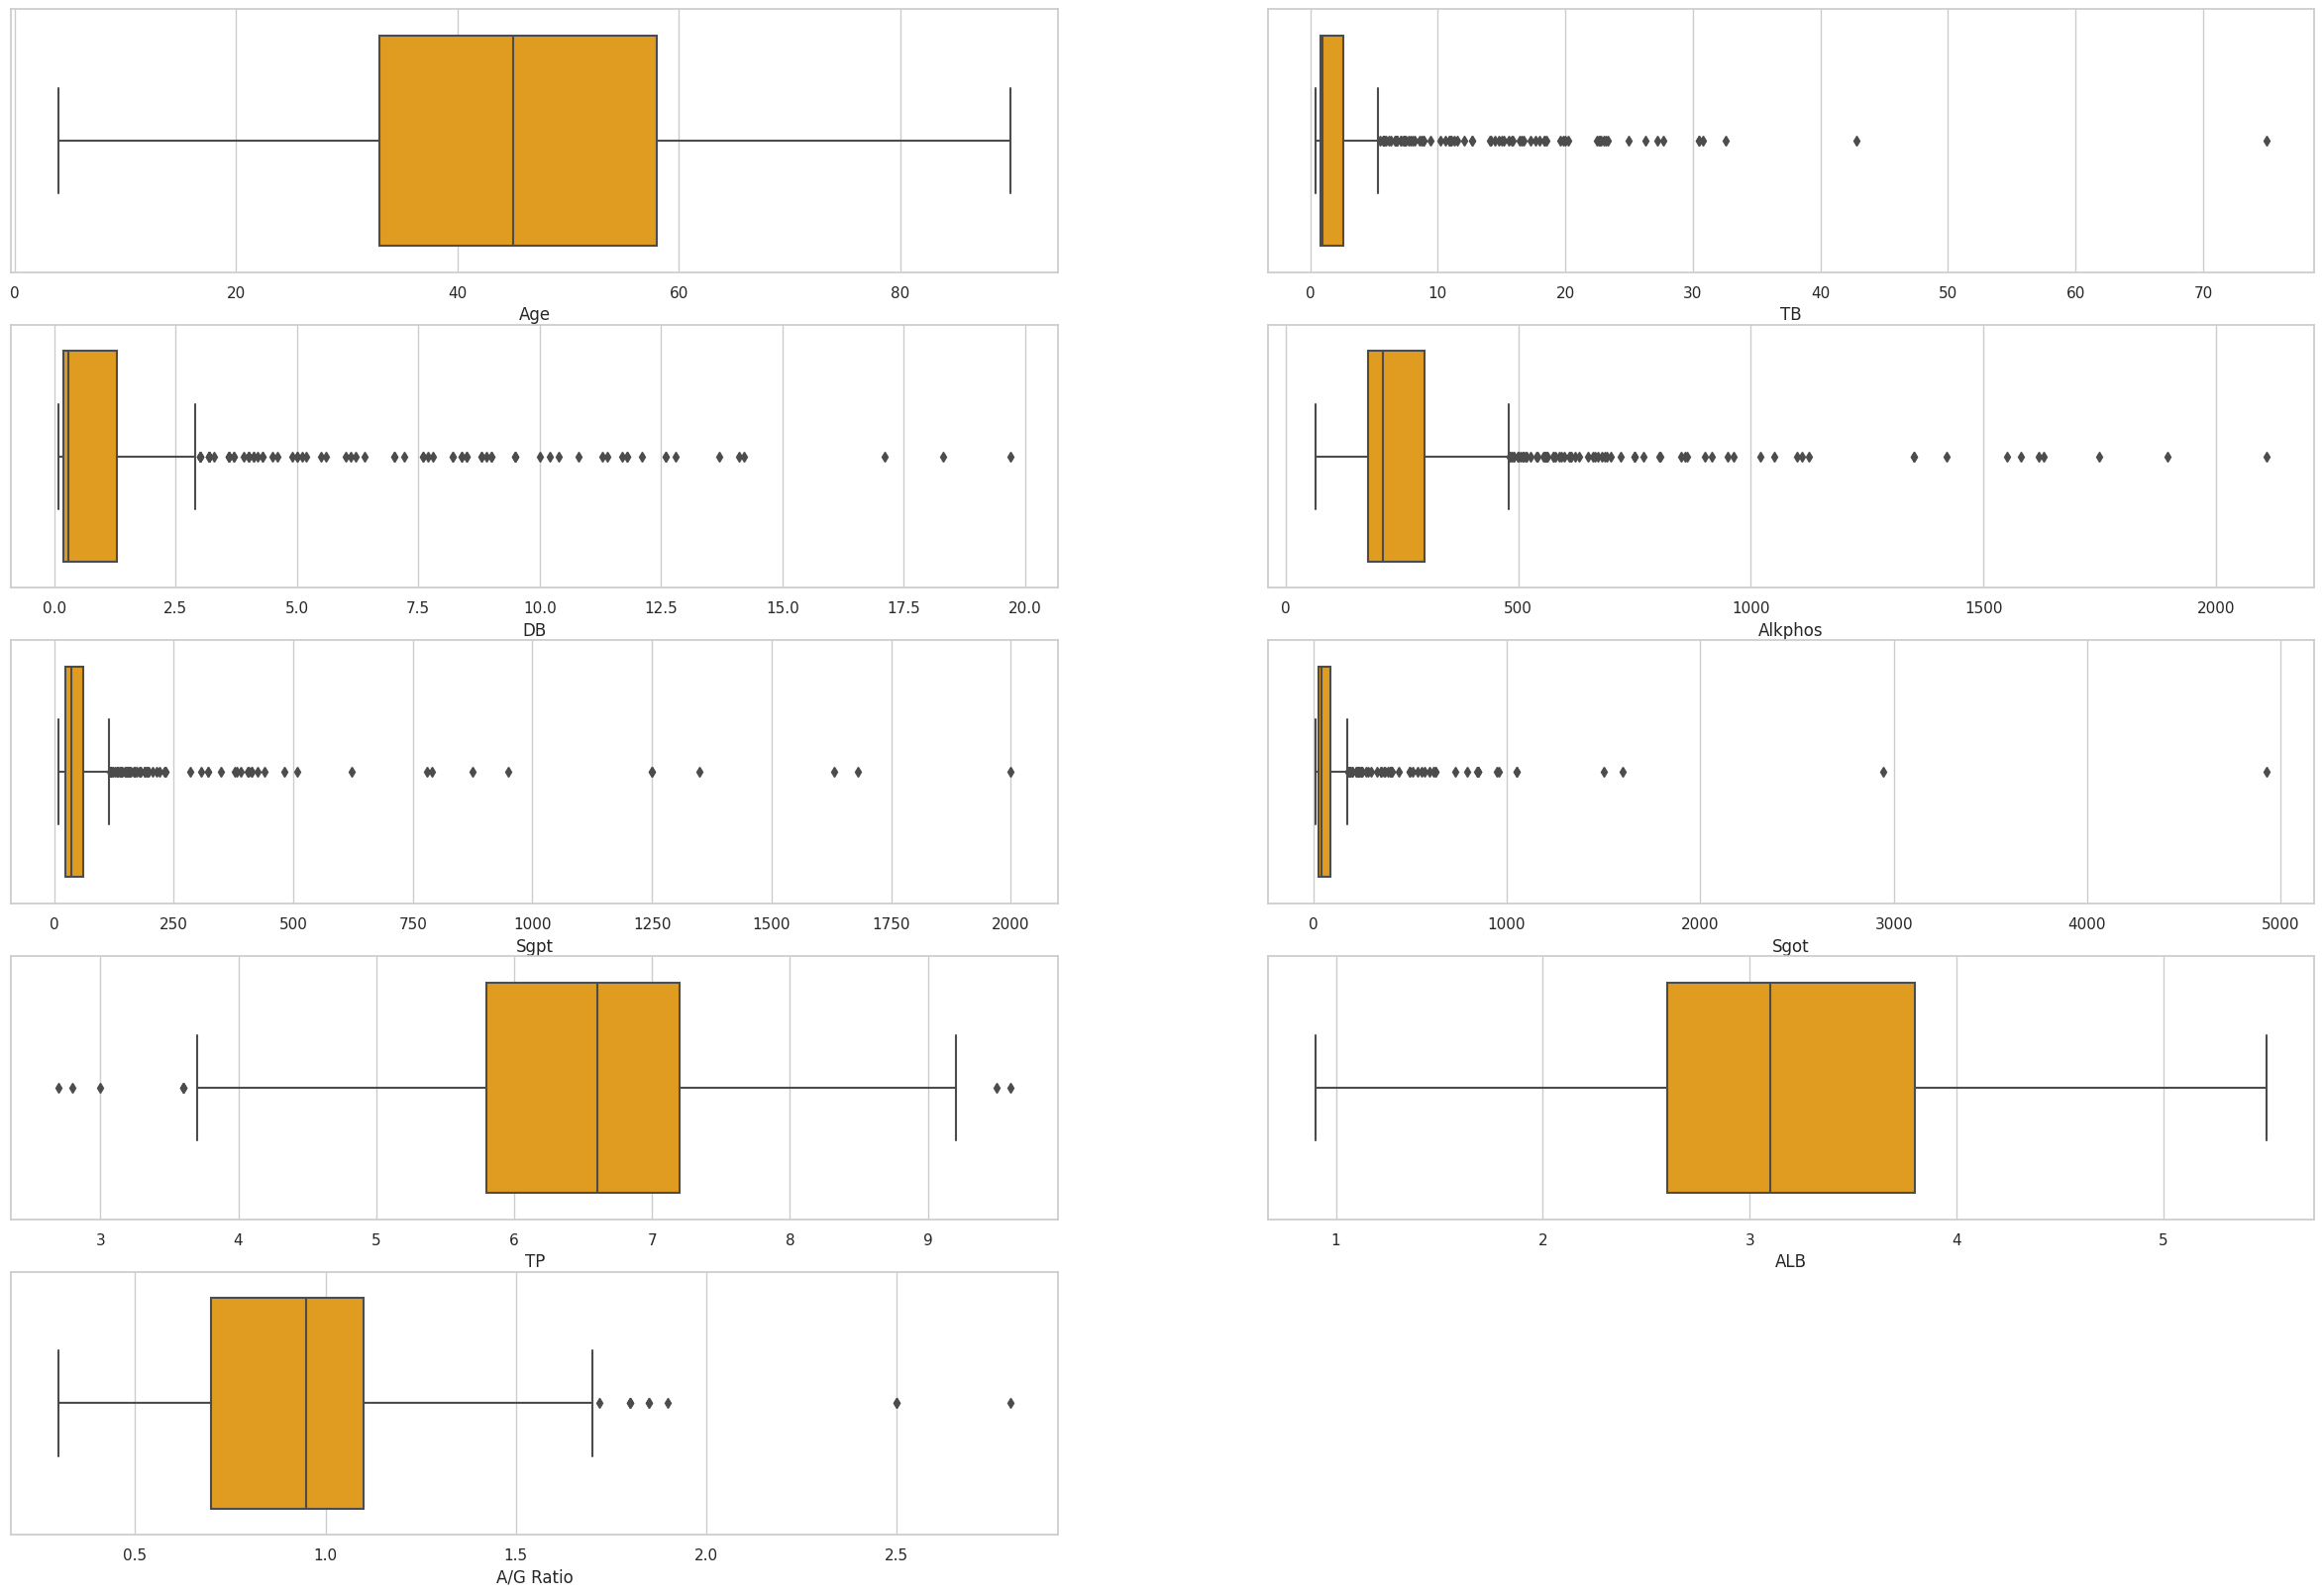

In [ ]:
columns_to_plot = df3.columns
plt.figure(figsize=(30, 20), facecolor='white')
for i, column in enumerate(columns_to_plot):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=df[column], color='orange')
    plt.xlabel(column)
plt.show()

**Handling Categorical Data**

Converting categorical values to numerical data.

In [ ]:
df['Gender'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [ ]:
df['Gender'].value_counts()

Male      430
Female    140
Name: Gender, dtype: int64

In [ ]:
# Mapping the values
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

<ipython-input-37-c0b57c83ce62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=df['Gender'].map({'Male':0,'Female':1})


In [ ]:
df['Gender'].value_counts()

0    430
1    140
Name: Gender, dtype: int64

**NOTE:** Male is 0 and Female is 1

## Feature Scalling

In [ ]:
# Initialising independent and dependent variables

x=df.drop(['Label'],axis=1)
y=df['Label']

In [ ]:
# Performing MinMax Scaling (run only once)
mc=MinMaxScaler()
scaled_x=mc.fit_transform(x)

In [ ]:
scaled_x

array([[0.70930233, 1.        , 0.00402145, ..., 0.5942029 , 0.52173913,
        0.24      ],
       [0.6744186 , 0.        , 0.14075067, ..., 0.69565217, 0.5       ,
        0.176     ],
       [0.6744186 , 0.        , 0.0924933 , ..., 0.62318841, 0.52173913,
        0.236     ],
       ...,
       [0.55813953, 0.        , 0.00536193, ..., 0.53623188, 0.5       ,
        0.28      ],
       [0.31395349, 0.        , 0.01206434, ..., 0.5942029 , 0.54347826,
        0.28      ],
       [0.39534884, 0.        , 0.0080429 , ..., 0.66666667, 0.76086957,
        0.48      ]])

## Model Creation

In [ ]:
X=scaled_x
Y=df['Label']

In [ ]:
df['Label'].value_counts()

1    406
2    164
Name: Label, dtype: int64

Balancing the data.

In [ ]:
# We need to balance the data for Y. Using SMOTE we are going to balance the data

In [ ]:
smote = SMOTE()

In [ ]:
x_smote, y_smote = smote.fit_resample(X,Y)

In [ ]:
from collections import Counter  ## counter no.of label for feature
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 406, 2: 164})
SMOTE Classes Counter({1: 406, 2: 406})


In [ ]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote, y_smote,test_size=0.25,random_state=42)

### Logistic Regression

In [ ]:
# Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()      
log_reg.fit(x_train,y_train)        

LogisticRegression()

In [ ]:
# Making predictions on the testing set
x_test_pred_log=log_reg.predict(x_test)

In [ ]:
x_test_pred_log

array([1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 1, 2])

In [ ]:
# Making predictions on the training set
x_train_pred_log=log_reg.predict(x_train)

### Evaluating Logistic Regression

In [ ]:
## Accuracy for training
Accuracy_train_log=accuracy_score(y_train,x_train_pred_log)
Accuracy_train_log

0.7093596059113301

In [ ]:
## Accuracy for testing
Accuracy_test_log=accuracy_score(y_test,x_test_pred_log)
Accuracy_test_log

0.7536945812807881

In [ ]:
## Report for testing
report_test_log=classification_report(y_test, x_test_pred_log)# it will give precision,recall,f1 scores and accuracy  
print(report_test_log)

              precision    recall  f1-score   support

           1       0.81      0.60      0.69        93
           2       0.72      0.88      0.80       110

    accuracy                           0.75       203
   macro avg       0.77      0.74      0.74       203
weighted avg       0.76      0.75      0.75       203



In [ ]:
## Report for training
report_train_log=classification_report(y_train, x_train_pred_log)# it will give precision,recall,f1 scores and accuracy  
print(report_train_log)

              precision    recall  f1-score   support

           1       0.79      0.59      0.68       313
           2       0.66      0.83      0.74       296

    accuracy                           0.71       609
   macro avg       0.72      0.71      0.71       609
weighted avg       0.73      0.71      0.71       609



In [ ]:
print('Testing score for logistic regression is',log_reg.score(x_test,y_test))

Testing score for logistic regression is 0.7536945812807881


In [ ]:
print('Training score for logistic regression is',log_reg.score(x_train,y_train))

Training score for logistic regression is 0.7093596059113301


## KNN Classifier

In [ ]:
KNN = KNeighborsClassifier(5)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
x_train_pred_KNN=KNN.predict(x_train)
x_train_pred_KNN

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,

In [ ]:
x_test_pred_KNN=KNN.predict(x_test)
x_test_pred_KNN

array([1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1])

## Evaluating KNN

In [ ]:
# Accuracy for testing
Accuracy_test_KNN=accuracy_score(y_test,x_test_pred_KNN)
Accuracy_test_KNN

0.7241379310344828

In [ ]:
# Accuracy for training
Accuracy_train_KNN=accuracy_score(y_train,x_train_pred_KNN)
Accuracy_train_KNN

0.7931034482758621

In [ ]:
# Report for testing
report_test_KNN=classification_report(y_test, x_test_pred_KNN)# it will give precision,recall,f1 scores and accuracy  
print(report_test_KNN)

              precision    recall  f1-score   support

           1       0.80      0.53      0.64        93
           2       0.69      0.89      0.78       110

    accuracy                           0.72       203
   macro avg       0.75      0.71      0.71       203
weighted avg       0.74      0.72      0.71       203



In [ ]:
# Report for training
report_train_KNN=classification_report(y_train, x_train_pred_KNN)# it will give precision,recall,f1 scores and accuracy  
print(report_train_KNN)

              precision    recall  f1-score   support

           1       0.92      0.65      0.76       313
           2       0.72      0.94      0.82       296

    accuracy                           0.79       609
   macro avg       0.82      0.80      0.79       609
weighted avg       0.82      0.79      0.79       609



In [ ]:
print('Testing score for KNN regression is',KNN.score(x_test,y_test))

Testing score for KNN regression is 0.7241379310344828


In [ ]:
print('Training score for KNN regression is',KNN.score(x_train,y_train))

Training score for KNN regression is 0.7931034482758621


## Support Vector Machine

In [ ]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
# Making predictions on the testing set
x_test_pred_SVM = svm.predict(x_test)
x_test_pred_SVM

array([1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2])

In [ ]:
# Making predictions on the training set
x_train_pred_SVM=svm.predict(x_train)
x_train_pred_SVM

array([2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,

## Evaluating SupportVectorClassifier

In [ ]:
# Accuracy for testing
Accuracy_test_SVM=accuracy_score(y_test,x_test_pred_SVM)
Accuracy_test_SVM

0.7339901477832512

In [ ]:
# Accuracy for training
Accuracy_train_SVM=accuracy_score(y_train,x_train_pred_SVM)
Accuracy_train_SVM

0.7011494252873564

In [ ]:
# Report for testing
report_test_SVM=classification_report(y_test, x_test_pred_SVM)# it will give precision,recall,f1 scores and accuracy  
print(report_test_SVM)

              precision    recall  f1-score   support

           1       0.91      0.46      0.61        93
           2       0.68      0.96      0.80       110

    accuracy                           0.73       203
   macro avg       0.80      0.71      0.71       203
weighted avg       0.79      0.73      0.71       203



In [ ]:
# Report for training
report_train_SVM=classification_report(y_train, x_train_pred_SVM)# it will give precision,recall,f1 scores and accuracy  
print(report_train_SVM)

              precision    recall  f1-score   support

           1       0.91      0.47      0.62       313
           2       0.63      0.95      0.76       296

    accuracy                           0.70       609
   macro avg       0.77      0.71      0.69       609
weighted avg       0.77      0.70      0.68       609



In [ ]:
print('Testing score for SVM regression is',svm.score(x_test,y_test))

Testing score for SVM regression is 0.7339901477832512


In [ ]:
print('Training score for SVM regression is',svm.score(x_train,y_train))

Training score for SVM regression is 0.7011494252873564


**A project by Abhisht Mishra**